In [1]:
from IPython.core.display import HTML
with open('style.css', 'r') as file:
    css = file.read()
HTML(css)

# Case Study: Finding a Path

We start by defining a relation $R$:

In [2]:
R = { (1,2), (2,3), (1,3), (2,4), (4,5), (3,6) }

In order to visualize this relation as a graph, we use some **graphviz** magic.  Don't worry about the details of displaying the graph, as you are not required to understand these details.

In [8]:
import graphviz as gv

def dot_graph(R):
    '''This function takes a binary relation R as inputs and shows this relation as
       a graph using the module graphviz.
    '''
    dot = gv.Digraph(graph_attr={'rankdir':'LR'})
    Nodes = { p[0] for p in R } | { p[1] for p in R }
    for n in Nodes:
        dot.node(str(n))
    for (x, y) in R:
        dot.edge(str(x), str(y))
    return dot

Using the function defined above, we can now visualize the relation $R$ as a graph:

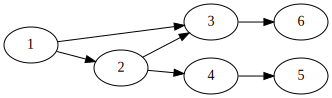

In [9]:
dot = dot_graph(R)
dot

We can even output this graph as in *PDF*.  This will create a PDF file with the name "<tt>graph.pdf</tt>".

In [7]:
dot.render('graph', view=True)  

'graph.pdf'

The relational product of two relations $R_1$ and $R_2$ is defined as follows:
$$ R_1 \circ R_2 := 
\Bigl\{ \langle x, z \rangle 
\mid \exists y: \bigl(\langle x, y\rangle \in R_1 \wedge \langle y, z \rangle \in R_2\bigr)
\Bigr\}
$$

In [10]:
def product(R1, R2):
    "Compute the relational product of R1 and R2."
    return { (x, z) for (x, y1) in R1 
                    for (y2, z) in R2 
                    if y1 == y2 
           }

Lets try this function using the relation $R$ defined above.

In [11]:
R2 = product(R, R)
R2

{(1, 3), (1, 4), (1, 6), (2, 5), (2, 6)}

We can visualize the relation <tt>R2</tt>.  However, let us first show the original relation $R$ again as a reference.

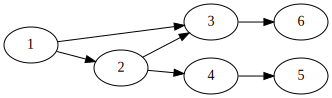

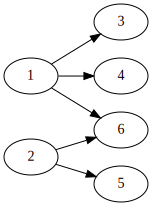

In [12]:
display(dot_graph(R))
display(dot_graph(R2))

It is also interesting to visualize the relation $R \cup R \circ R$:

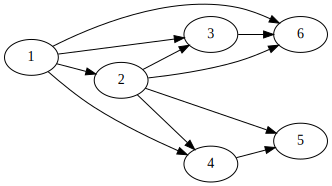

In [13]:
dot_graph(R | R2)

The transitive closure of a binary relation $R \subseteq M \times M$ can be computed by the following fixpoint iteration:
$$ R_{n+1} = R \cup R \circ R_n $$ 

In [ ]:
def transClosure(R):
    T = R
    while True:
        oldT = T
        T    = R | product(R,T)
        if T == oldT:
            return T

Lets compute the transitive closure of the relation $R$ defined at the beginning of the notebook.

In [ ]:
T = transClosure(R)

Let us view this relation as a graph:

In [ ]:
dot_graph(T)

The following function joins to paths into a single path.

In [ ]:
def join(L1, L2):
    return L1 + L2[1:]

Let us see how it works.

In [ ]:
join( (1, 2, 3), (3, 4, 5))

The function <tt>pathProduct</tt> defined below is a generalization of the function <tt>product</tt>.  Instead of combining pairs, it combines tuples of arbitrary length.

In [ ]:
def pathProduct(P, R):
    return { join(T1, T2) for T1 in P 
                          for T2 in R 
                          if T1[-1] == T2[0] 
           }

Lets see what how this function performs on our relation $R$.

In [ ]:
pathProduct(R, R)

In [ ]:
pathProduct(R, pathProduct(R, R))

As a generalization of the function <tt>product</tt> we define the function <tt>pathClosure</tt>.  Instead of using relations, this function takes sets of tuples where the tuples are representing paths in a graph.

In [ ]:
def pathClosure(R):
    P = R
    while True:
        oldP = P
        P    = R | pathProduct(P, R)
        if P == oldP:
            return P

Let us see this in action:

In [ ]:
P = pathClosure(R)
P

Let us change the graph $R$ so that it becomes cyclic:

In [ ]:
R.add((6, 1))

In [ ]:
R

In [ ]:
dot_graph(R)

First, we compute all paths of length $2$:

In [ ]:
R2 = pathProduct(R, R)
R2

Everything seems to be just fine so far.  Let's compute the paths of length 4:

In [ ]:
R4 = pathProduct(R2, R2)
R4

The last path, i.e. the path <tt>(6, 1, 3, 6, 1)</tt> is cyclic!  If we would keep cyclic paths in our function <tt>pathClosure</tt>, then this function does not terminate, as it will find paths that become longer and longer.
The following function checks whether a path $P$ is cyclic.  To check whether a path is cyclic, we just have to check if a node occurs more than once.  The easiest way to check this is to turn $P$ into a set.  If the number of elements of this set is less than the length of $P$, then $P$ must be cyclic.

In [ ]:
def cyclic(P):
    return len(set(P)) < len(P)

Now we are ready to redefine the function <tt>pathClosure</tt> so that it also works for a cyclic relation.  The only thing we need to change is the definition of the function <tt>pathProduct</tt> so that it does not return cyclic paths.

In [ ]:
def pathProduct(P, R):
    return { join(T1, T2) for T1 in P 
                          for T2 in R 
                          if T1[-1] == T2[0] and not cyclic(join(T1, T2)) 
           }

Let us try to compute all paths in our cyclic relation $R$.  First, lets view $R$ again:

In [ ]:
dot_graph(R)

In [ ]:
pathClosure(R)

It works:  None of the paths returned is cyclic and all non-cyclic paths are listed.